<a href="https://colab.research.google.com/github/nixmaverick1997/EnsembleMethods/blob/main/EnsembleMethods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

# Activity 1- Observation of Ensemble models in the presence of different levels of noise

In [20]:
def visualize(X,y):
  #Parameter X= ndarray, y=target array
  # When the label y is 0, the class is represented with a blue square.
  # When the label y is 1, the class is represented with a green triangle.
  plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
  plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")

  # X contains two features, x1 and x2
  plt.xlabel(r"$x_1$", fontsize=20)
  plt.ylabel(r"$x_2$", fontsize=20)

  # Simplifying the plot by removing the axis scales.
  plt.xticks([])
  plt.yticks([])

  # Displaying the plot.
  
  return plt.show()

In [26]:
from sklearn.model_selection import train_test_split

def preprocess(X,y):
  #Parameters: X= ndarray, y= target array
  #Does training split on dataset
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
  return X_train,X_test,y_train,y_test

In [22]:
from sklearn.datasets import make_moons

def create_dataset(n):
  #Parameter: n= Noise
  #Creates a make_moon dataset of noise level n
  X,y=make_moons(n_samples=1500, noise=n, random_state=42)
  return X,y

noises=[0.04,0.1,0.2]
x_n=[]
y_n=[]

for noise in noises:
  X,y=create_dataset(noise)
  x_n.append(X)
  y_n.append(y)


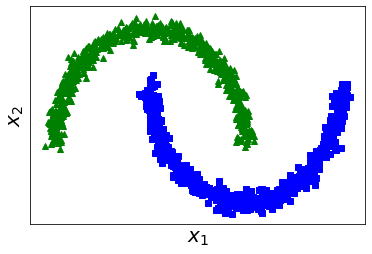

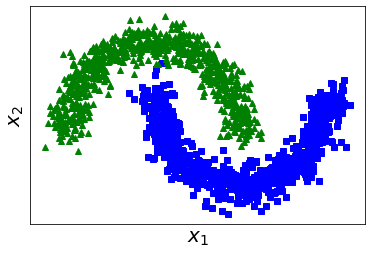

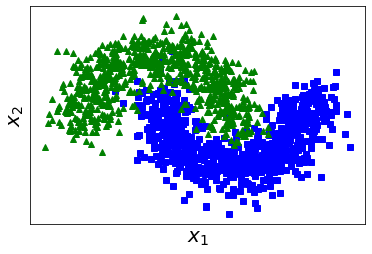

In [23]:
for i in range(3):
  visualize(x_n[i],y_n[i])

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

def train_on_rf(X,y):
  model=RandomForestClassifier()
  X_train,X_test,y_train,y_test=preprocess(X,y)
  model.fit(X_train, y_train)
  return model.score(X_test,y_test)

def train_on_gbc(X,y):
  model=GradientBoostingClassifier()
  X_train,X_test,y_train,y_test=preprocess(X,y)
  model.fit(X_train, y_train)
  return model.score(X_test,y_test)

def train_on_dt(X,y):
  model=DecisionTreeClassifier()
  X_train,X_test,y_train,y_test=preprocess(X,y)
  model.fit(X_train, y_train)
  return model.score(X_test,y_test)

,Noise,Random Forest,Gradient Boost,Decision Tree
0,0.04,0.993333,1.0,0.986667
1,0.1,0.993333,0.993333,0.986667
2,0.2,0.986667,0.98,0.963333


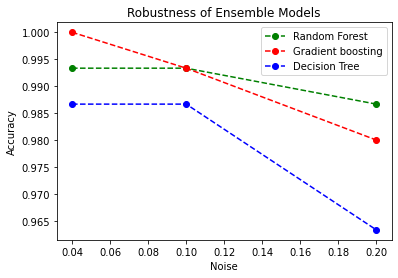

In [25]:
#training all the model on the all the possible noise values
df_noise=pd.DataFrame(columns=['Noise','Random Forest','Gradient Boost', 'Decision Tree'])

scores_rf=[]
scores_gbc=[]
scores_dt=[]

for i in range(3):
  scores_rf.append(train_on_rf(x_n[i],y_n[i]))
  scores_gbc.append(train_on_gbc(x_n[i],y_n[i]))
  scores_dt.append(train_on_dt(x_n[i],y_n[i]))
for a in range(3):
  df_noise.at[a]=pd.Series({'Noise': noises[a],'Random Forest':scores_rf[a],'Gradient Boost':scores_gbc[a], 'Decision Tree':scores_dt[a]})


plt.plot(noises, scores_rf, "o--", color="g", label="Random Forest")
plt.plot(noises, scores_gbc, "o--", color="r", label="Gradient boosting")
plt.plot(noises, scores_dt, "o--", color="b", label="Decision Tree")
plt.legend(loc="upper right")
plt.xlabel("Noise")
plt.ylabel("Accuracy")
plt.title("Robustness of Ensemble Models")

df_noise

As seen in the above diagram, **decision tree classifier** suffers the *worst* among all the models, with increase in dataset noise. Random forest and gradient boosting classifiers prove to be robust in noisy datasets. But **Random Forest** has the *best* uniform performance across all noise levels.

# Activity 2- Hyperparameter Analysis

In [27]:
from sklearn.metrics import f1_score

#Creating a source dataset for this activity
X,y=make_moons(n_samples=1500, random_state=42)
X_train,X_test,y_train,y_test=preprocess(X,y)

In [28]:
def visualize_hyp(X_train,y_train_pred,X_test,y_test_pred):
  #Parameter X= ndarray, y=target array
  # When the label y is 0, the class is represented with a blue square.
  # When the label y is 1, the class is represented with a green triangle.
  plt.plot(X_train[:, 0][y_train_pred==1], X_train[:, 1][y_train_pred==1], "rs")
  plt.plot(X_train[:, 0][y_train_pred==0], X_train[:, 1][y_train_pred==0], "g^")
  plt.plot(X_test[:, 0][y_test_pred==1], X_test[:, 1][y_test_pred==1], "bs")
  plt.plot(X_test[:, 0][y_test_pred==0], X_test[:, 1][y_test_pred==0], "y^")

  # X contains two features, x1 and x2
  plt.xlabel(r"$x_1$", fontsize=20)
  plt.ylabel(r"$x_2$", fontsize=20)

  # Simplifying the plot by removing the axis scales.
  plt.xticks([])
  plt.yticks([])

  # Displaying the plot.
  
  return plt.show()

In [29]:
model_rf=RandomForestClassifier()

#displaying all parameters
for parameter in model_rf.get_params():
    print(parameter)

bootstrap
ccp_alpha
class_weight
criterion
max_depth
max_features
max_leaf_nodes
max_samples
min_impurity_decrease
min_samples_leaf
min_samples_split
min_weight_fraction_leaf
n_estimators
n_jobs
oob_score
random_state
verbose
warm_start


For criterion:  gini
- For no. of estimators=  50
--- For maximum depth=  1
oooo Accuracy score=  0.9155555555555556
oooo F1 score=  0.9188034188034188


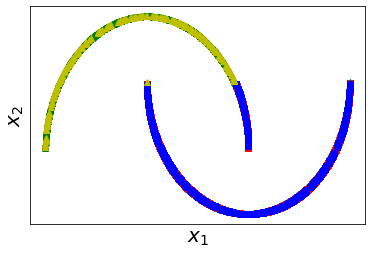

--- For maximum depth=  5
oooo Accuracy score=  0.9977777777777778
oooo F1 score=  0.9976798143851509


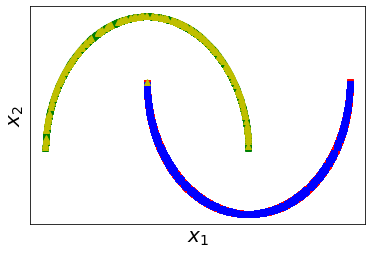

--- For maximum depth=  50
oooo Accuracy score=  1.0
oooo F1 score=  1.0


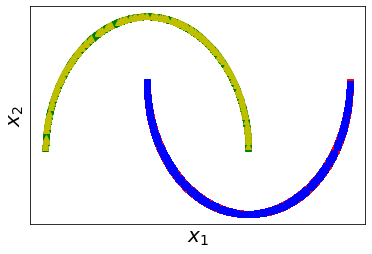

***********************************************************
- For no. of estimators=  100
--- For maximum depth=  1
oooo Accuracy score=  0.9177777777777778
oooo F1 score=  0.9204301075268817


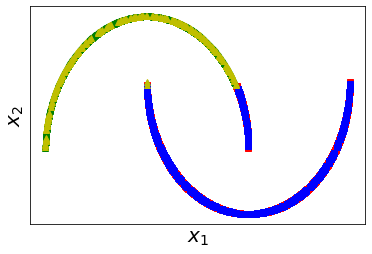

--- For maximum depth=  5
oooo Accuracy score=  1.0
oooo F1 score=  1.0


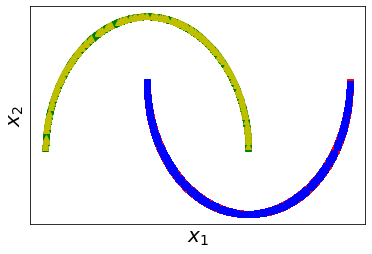

--- For maximum depth=  50
oooo Accuracy score=  1.0
oooo F1 score=  1.0


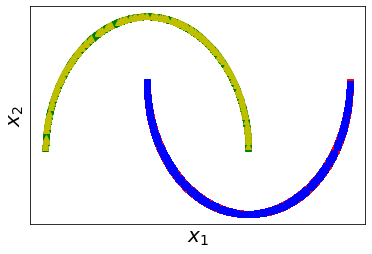

***********************************************************
- For no. of estimators=  300
--- For maximum depth=  1
oooo Accuracy score=  0.9177777777777778
oooo F1 score=  0.9204301075268817


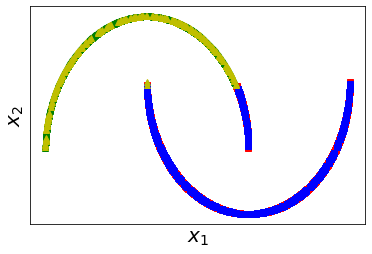

--- For maximum depth=  5
oooo Accuracy score=  0.9977777777777778
oooo F1 score=  0.9976798143851509


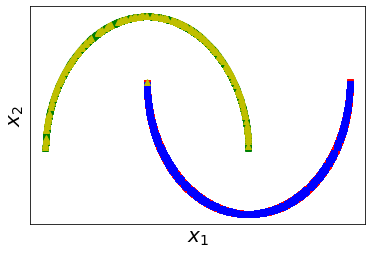

--- For maximum depth=  50
oooo Accuracy score=  1.0
oooo F1 score=  1.0


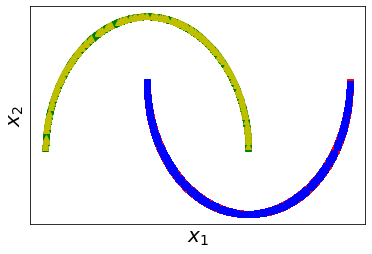

***********************************************************
For criterion:  entropy
- For no. of estimators=  50
--- For maximum depth=  1
oooo Accuracy score=  0.9155555555555556
oooo F1 score=  0.9188034188034188


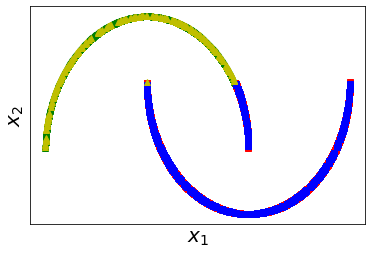

--- For maximum depth=  5
oooo Accuracy score=  0.9977777777777778
oooo F1 score=  0.9976798143851509


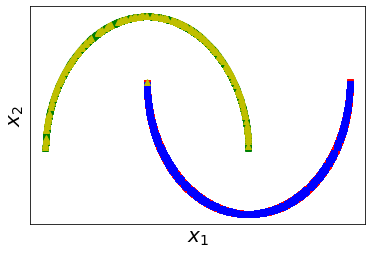

--- For maximum depth=  50
oooo Accuracy score=  1.0
oooo F1 score=  1.0


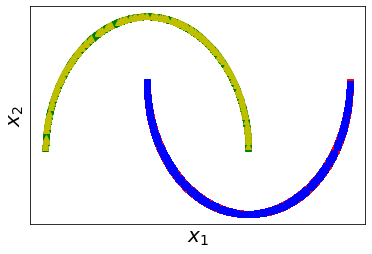

***********************************************************
- For no. of estimators=  100
--- For maximum depth=  1
oooo Accuracy score=  0.9155555555555556
oooo F1 score=  0.9188034188034188


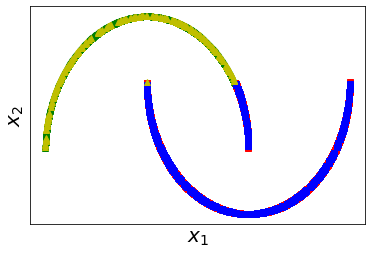

--- For maximum depth=  5
oooo Accuracy score=  0.9977777777777778
oooo F1 score=  0.9976798143851509


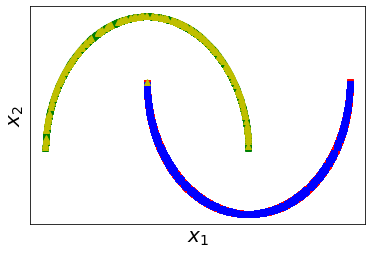

--- For maximum depth=  50
oooo Accuracy score=  1.0
oooo F1 score=  1.0


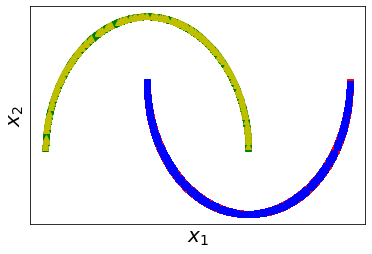

***********************************************************
- For no. of estimators=  300
--- For maximum depth=  1
oooo Accuracy score=  0.9155555555555556
oooo F1 score=  0.9188034188034188


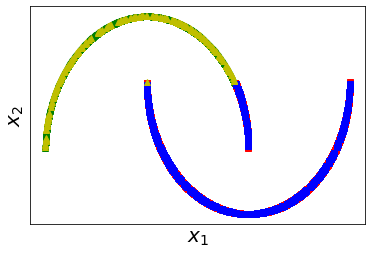

--- For maximum depth=  5
oooo Accuracy score=  0.9977777777777778
oooo F1 score=  0.9976798143851509


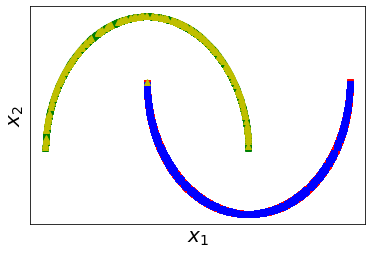

--- For maximum depth=  50
oooo Accuracy score=  1.0
oooo F1 score=  1.0


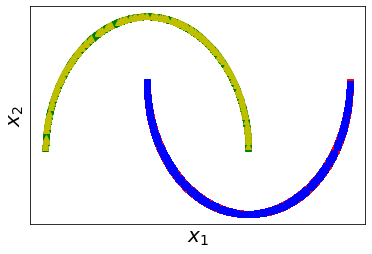

***********************************************************


In [30]:
df_rf=pd.DataFrame(columns=['Criterion','Estimators','Max Depth','Accuracy Score','F1 Score'])
#storing scores in dataframe
i=0
for c in ['gini','entropy']:
  model_rf.set_params(criterion=c)
  print("For criterion: ", c)
  for n_e in [50,100,300]:
    model_rf.set_params(n_estimators=n_e)
    print("- For no. of estimators= ", n_e)
    for m_d in [1,5,50]:
      print("--- For maximum depth= ", m_d)
      params={"criterion":c,"n_estimators":n_e,"max_depth":m_d}
      model_rf.set_params(**params)
      model_rf.fit(X_train,y_train)
      scores= model_rf.score(X_test,y_test)
      f1_scores= f1_score(y_test,model_rf.predict(X_test))
      val={'Criterion':c,'Estimators':n_e,'Max Depth':m_d,'Accuracy Score':scores,'F1 Score':f1_scores}
      df_rf.at[i]=pd.Series(val)
      i=i+1
      print("oooo Accuracy score= ",scores)
      print("oooo F1 score= ",f1_scores)
      visualize_hyp(X_train,model_rf.predict(X_train),X_test,model_rf.predict(X_test))
    print("***********************************************************")

In [31]:
df_rf

,Criterion,Estimators,Max Depth,Accuracy Score,F1 Score
0,gini,50,1,0.915556,0.918803
1,gini,50,5,0.997778,0.99768
2,gini,50,50,1.0,1.0
3,gini,100,1,0.917778,0.92043
4,gini,100,5,1.0,1.0
5,gini,100,50,1.0,1.0
6,gini,300,1,0.917778,0.92043
7,gini,300,5,0.997778,0.99768
8,gini,300,50,1.0,1.0
9,entropy,50,1,0.915556,0.918803


In [32]:
#gradient boosting
model_gbc=GradientBoostingClassifier()
for parameter in model_gbc.get_params():
    print(parameter)

ccp_alpha
criterion
init
learning_rate
loss
max_depth
max_features
max_leaf_nodes
min_impurity_decrease
min_samples_leaf
min_samples_split
min_weight_fraction_leaf
n_estimators
n_iter_no_change
random_state
subsample
tol
validation_fraction
verbose
warm_start


For learning rate=  0.1
- For no. of estimators=  10
--- For maximum depth=  1
oooo Accuracy score=  0.9177777777777778
oooo F1 score=  0.9211087420042644


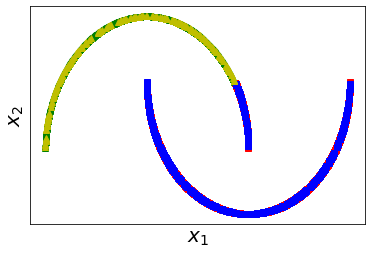

--- For maximum depth=  5
oooo Accuracy score=  1.0
oooo F1 score=  1.0


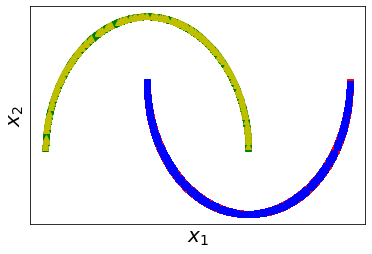

--- For maximum depth=  50
oooo Accuracy score=  1.0
oooo F1 score=  1.0


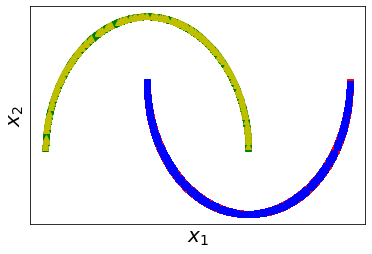

***********************************************************
- For no. of estimators=  100
--- For maximum depth=  1
oooo Accuracy score=  0.9977777777777778
oooo F1 score=  0.9976798143851509


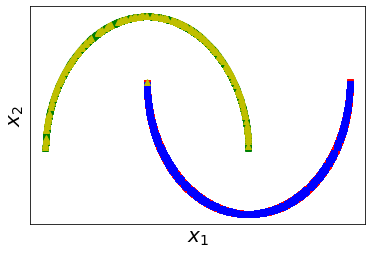

--- For maximum depth=  5
oooo Accuracy score=  1.0
oooo F1 score=  1.0


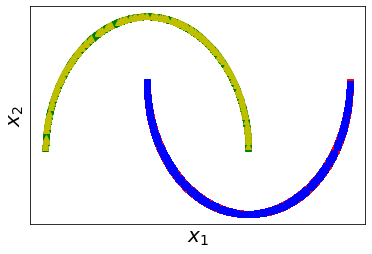

--- For maximum depth=  50
oooo Accuracy score=  1.0
oooo F1 score=  1.0


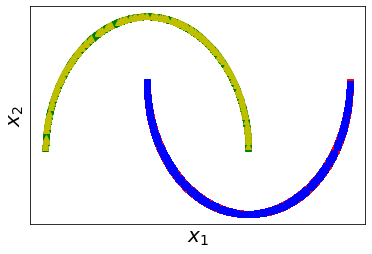

***********************************************************
- For no. of estimators=  300
--- For maximum depth=  1
oooo Accuracy score=  1.0
oooo F1 score=  1.0


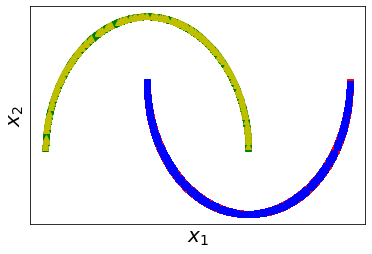

--- For maximum depth=  5
oooo Accuracy score=  1.0
oooo F1 score=  1.0


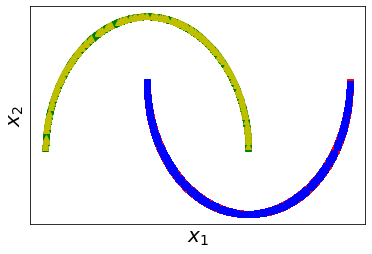

--- For maximum depth=  50
oooo Accuracy score=  1.0
oooo F1 score=  1.0


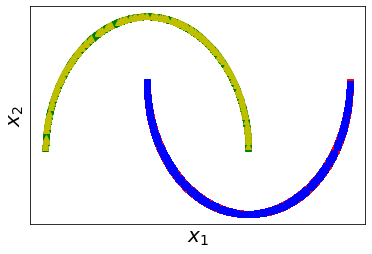

***********************************************************
For learning rate=  0.5
- For no. of estimators=  10
--- For maximum depth=  1
oooo Accuracy score=  0.9133333333333333
oooo F1 score=  0.9007633587786259


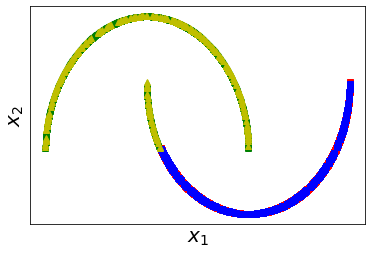

--- For maximum depth=  5
oooo Accuracy score=  1.0
oooo F1 score=  1.0


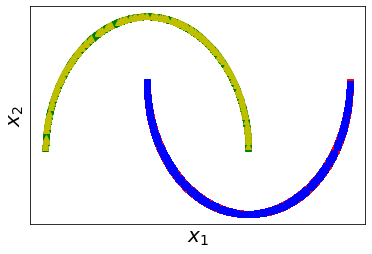

--- For maximum depth=  50
oooo Accuracy score=  1.0
oooo F1 score=  1.0


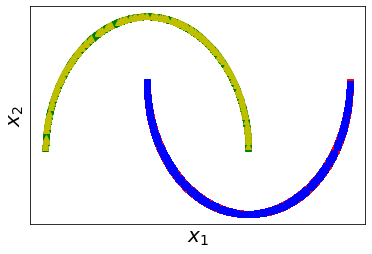

***********************************************************
- For no. of estimators=  100
--- For maximum depth=  1
oooo Accuracy score=  1.0
oooo F1 score=  1.0


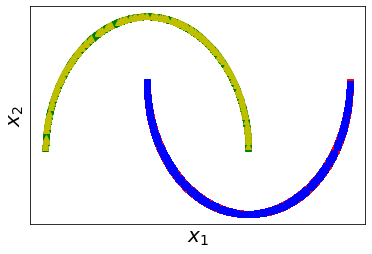

--- For maximum depth=  5
oooo Accuracy score=  1.0
oooo F1 score=  1.0


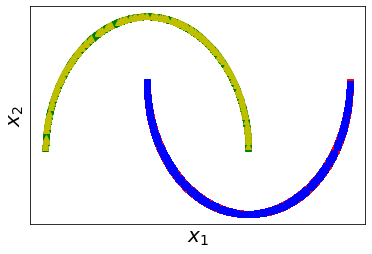

--- For maximum depth=  50
oooo Accuracy score=  1.0
oooo F1 score=  1.0


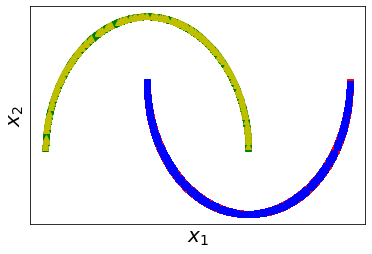

***********************************************************
- For no. of estimators=  300
--- For maximum depth=  1
oooo Accuracy score=  1.0
oooo F1 score=  1.0


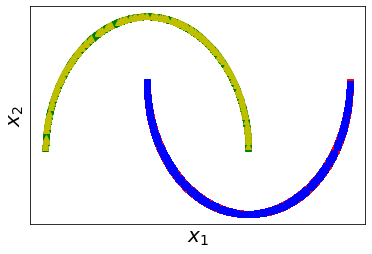

--- For maximum depth=  5
oooo Accuracy score=  1.0
oooo F1 score=  1.0


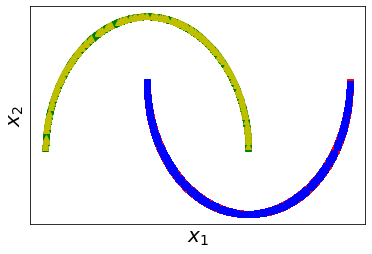

--- For maximum depth=  50
oooo Accuracy score=  1.0
oooo F1 score=  1.0


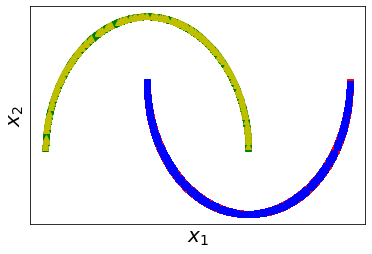

***********************************************************


In [33]:
df_gbc=pd.DataFrame(columns=['Learning Rate','Estimators','Max Depth','Accuracy Score','F1 Score'])
#storing scores in dataframe

i=0 #index of dataframe
#gradient boosting
for l in [0.1,0.5]:
  print("For learning rate= ", l)
  for n_e in [10,100,300]:
    print("- For no. of estimators= ", n_e)
    for m_d in [1,5,50]:
      params={"learning_rate":l,"n_estimators":n_e,"max_depth":m_d}
      print("--- For maximum depth= ", m_d)
      model_gbc.set_params(**params)
      model_gbc.fit(X_train,y_train)
      scores= model_gbc.score(X_test,y_test)
      f1_scores= f1_score(y_test,model_gbc.predict(X_test))      
      val={'Learning Rate':l,'Estimators':n_e,'Max Depth':m_d,'Accuracy Score':scores,'F1 Score':f1_scores}
      df_gbc.at[i]=pd.Series(val)
      i=i+1      
      print("oooo Accuracy score= ",scores)
      print("oooo F1 score= ",f1_scores)
      visualize_hyp(X_train,model_gbc.predict(X_train),X_test,model_gbc.predict(X_test))
    print("***********************************************************")

In [34]:
#decision tree
model_dt=DecisionTreeClassifier()
for parameter in model_dt.get_params():
    print(parameter)

ccp_alpha
class_weight
criterion
max_depth
max_features
max_leaf_nodes
min_impurity_decrease
min_samples_leaf
min_samples_split
min_weight_fraction_leaf
random_state
splitter


For criterion:  gini
--- For maximum depth=  1
oooo Accuracy score=  0.8377777777777777
oooo F1 score=  0.8554455445544555


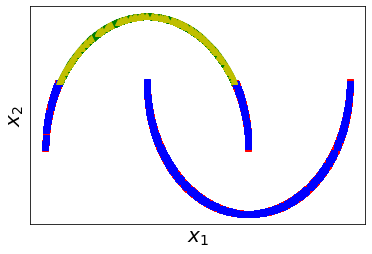

--- For maximum depth=  5
oooo Accuracy score=  1.0
oooo F1 score=  1.0


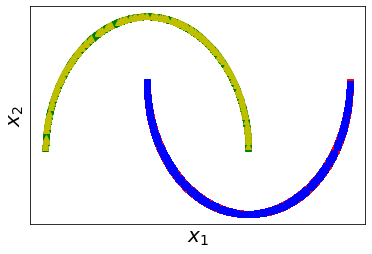

--- For maximum depth=  50
oooo Accuracy score=  1.0
oooo F1 score=  1.0


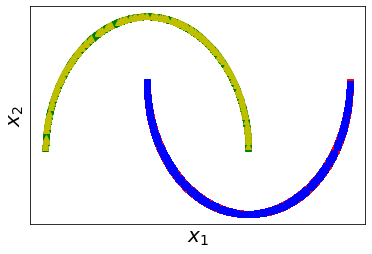

***********************************************************
For criterion:  entropy
--- For maximum depth=  1
oooo Accuracy score=  0.8377777777777777
oooo F1 score=  0.8554455445544555


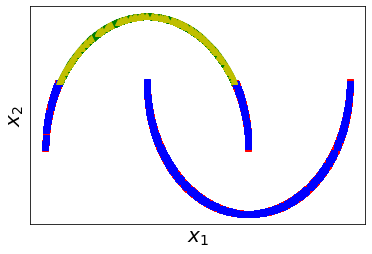

--- For maximum depth=  5
oooo Accuracy score=  1.0
oooo F1 score=  1.0


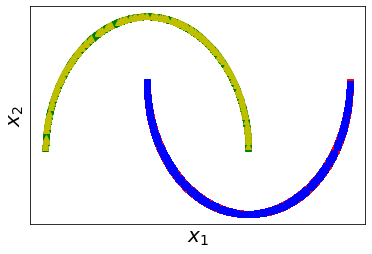

--- For maximum depth=  50
oooo Accuracy score=  1.0
oooo F1 score=  1.0


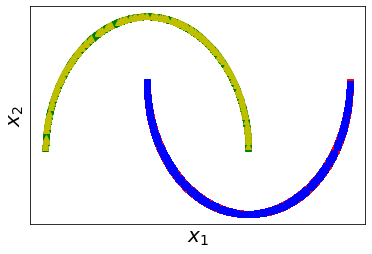

***********************************************************


In [35]:
df_dt=pd.DataFrame(columns=['Criterion','Max Depth','Accuracy Score','F1 Score'])
#storing scores in dataframe
i=0
#decision tree
for c in ['gini','entropy']:
  model_dt.set_params(criterion=c)
  print("For criterion: ", c)
  for m_d in [1,5,50]:
    params = {"criterion": c, "max_depth":m_d}
    print("--- For maximum depth= ", m_d)
    model_dt.set_params(**params)
    model_dt.fit(X_train,y_train)
    scores= model_dt.score(X_test,y_test)
    f1_scores= f1_score(y_test,model_dt.predict(X_test))      
    val={'Criterion':c,'Max Depth':m_d,'Accuracy Score':scores,'F1 Score':f1_scores}
    df_dt.at[i]=pd.Series(val)
    i=i+1      
    print("oooo Accuracy score= ",scores)
    print("oooo F1 score= ",f1_scores)
    visualize_hyp(X_train,model_dt.predict(X_train),X_test,model_dt.predict(X_test))
  print("***********************************************************")

In [36]:
df_rf

,Criterion,Estimators,Max Depth,Accuracy Score,F1 Score
0,gini,50,1,0.915556,0.918803
1,gini,50,5,0.997778,0.99768
2,gini,50,50,1.0,1.0
3,gini,100,1,0.917778,0.92043
4,gini,100,5,1.0,1.0
5,gini,100,50,1.0,1.0
6,gini,300,1,0.917778,0.92043
7,gini,300,5,0.997778,0.99768
8,gini,300,50,1.0,1.0
9,entropy,50,1,0.915556,0.918803


In [37]:
#Storing the dataframes in an Excel sheet
with pd.ExcelWriter("hyperparameter.xlsx") as writer:  
  df_rf.to_excel(writer,sheet_name='Random Forest')
  df_gbc.to_excel(writer,sheet_name='Gradient Boosting')
  df_dt.to_excel(writer,sheet_name='Decision Tree')